# **Customer segmentation**
https://www.youtube.com/watch?v=JZSYll1j6QA

# Configurações

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

import scipy.cluster.hierarchy as sch #para dendograma
from sklearn.cluster import AgglomerativeClustering #para silhueta
from sklearn.metrics import silhouette_score #para silhueta

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix


# Import data

In [122]:
df = pd.read_csv('Events Raw Data.csv')

In [123]:
df.shape

(14783, 19)

**Missing values**

In [124]:
df.isna().sum()

,0
CUSTOMER,0
Age,0
Gender,0
Postcode,0
District,0
Constituency,0
latitude,0
longitude,0
Current_Status,0
Total_Household_Income,5


In [125]:
df[df['Total_Household_Income'].isnull()]

,CUSTOMER,Age,Gender,Postcode,District,Constituency,latitude,longitude,Current_Status,Total_Household_Income,How often you attend Entertaining events in a year?,Social_Media,How many hours are you willing to travel to attend an event?,Do you enjoy adrenaline-rush activities?,"Are food areas, coffee areas, bars & toilets important to you?",What is your favourite attraction from below:,Were you satisfied with the last event you attended with us?,Would you recommend our events to other people?,Did you find our events value for money?
21,23,50-60,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,24,50-61,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,25,50-62,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,26,50-63,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,27,50-64,Female,EN3 4YQ,Enfield,Edmonton,51.643546,-0.029532,Married with children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
#Como as mesmas cinco observações tem todos os dados nulos, vamos remover:
df1 = df[df['Total_Household_Income'].isnull()==False].reset_index()
df1.isnull().sum()

,0
index,0
CUSTOMER,0
Age,0
Gender,0
Postcode,0
District,0
Constituency,0
latitude,0
longitude,0
Current_Status,0


#Features

**Análise descritiva**

In [127]:
for columns in df1:
  unique_vals = pd.unique(df1[columns])
  count_unique_vals = len(unique_vals)

  if count_unique_vals < 10:
    print(columns,'(',count_unique_vals,')')
    print(unique_vals)
    print('\n')
  else:
    print(columns,'(',count_unique_vals,')')
    print('[over 10 unique values]')
    print('\n')

index ( 14778 )
[over 10 unique values]


CUSTOMER ( 14778 )
[over 10 unique values]


Age ( 9 )
['40-49' '60-64' '50-59' '65 or older' '33-39' '26-32' '21-25'
 '17 or younger' '18-20']


Gender ( 2 )
['Female' 'Male']


Postcode ( 14674 )
[over 10 unique values]


District ( 225 )
[over 10 unique values]


Constituency ( 358 )
[over 10 unique values]


latitude ( 13242 )
[over 10 unique values]


longitude ( 13262 )
[over 10 unique values]


Current_Status ( 8 )
['Married with children' 'Married without children' 'Living with partner'
 'Divorced' 'Single, never married' 'Separated' 'Widowed' 'Step parent']


Total_Household_Income ( 8 )
['50,000 to 74,999' '35,000 to 49,999' '75,000 to 99,999'
 '100,000 to 149,999' '150,000 to 199,999' '200,000 or more'
 '20,000 to 34,999' 'Less than 20,000']


How often you attend Entertaining events in a year? ( 5 )
['4 Times a Year' '3 Times a Year' '1 Times a Year' '2 Times a Year'
 '5+ Times a Year']


Social_Media ( 5 )
['Up to 1 hour' "I don't 

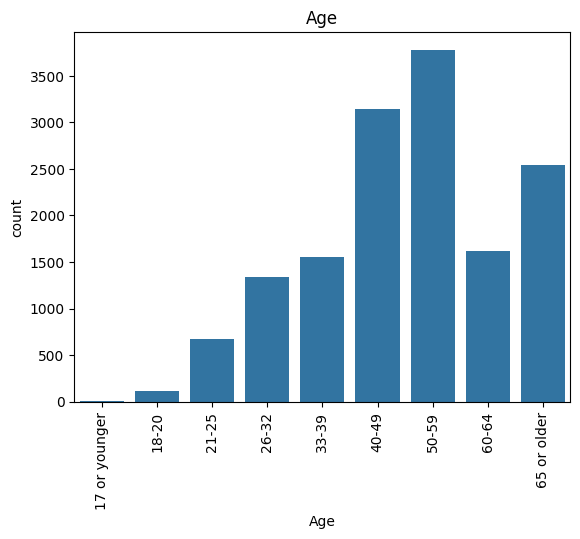

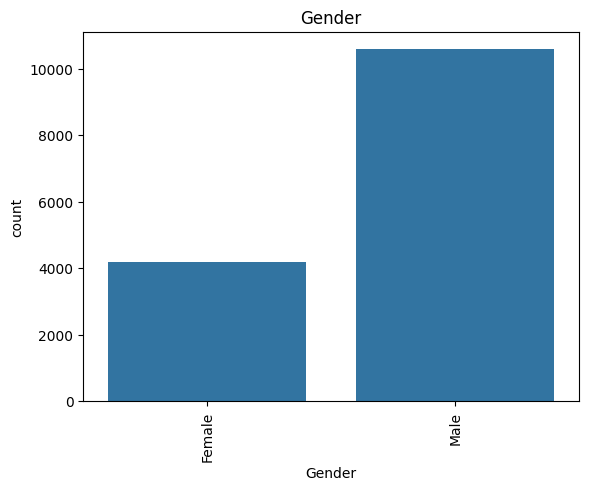

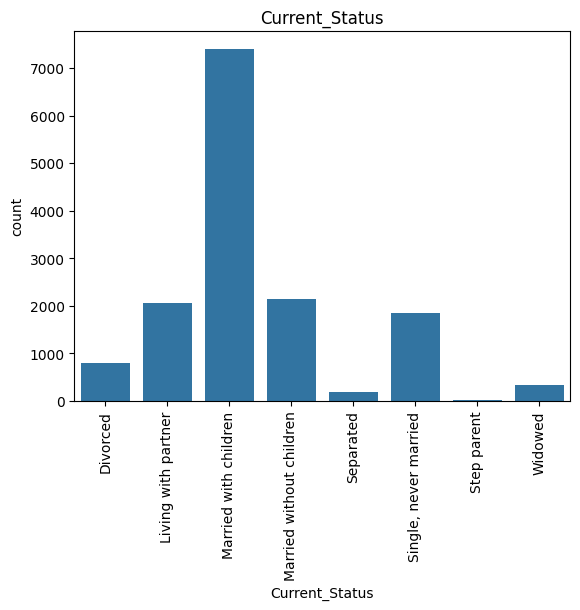

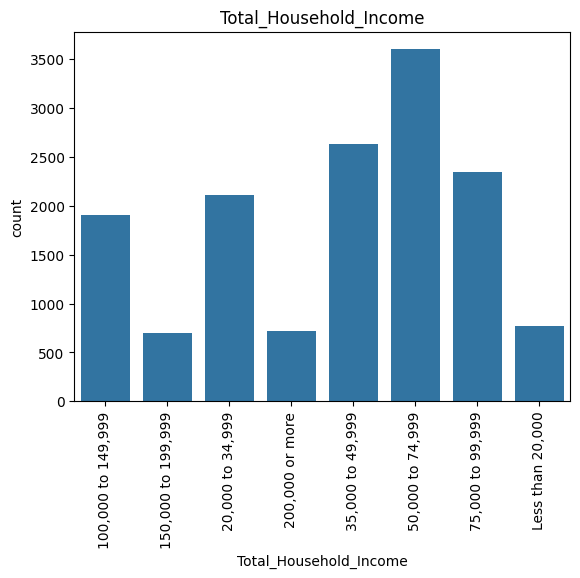

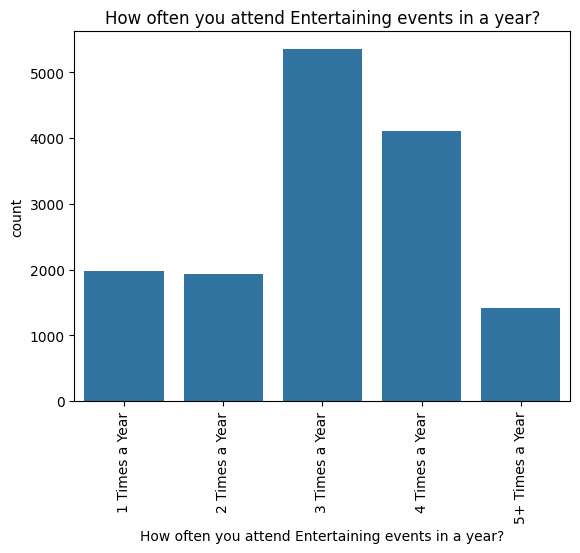

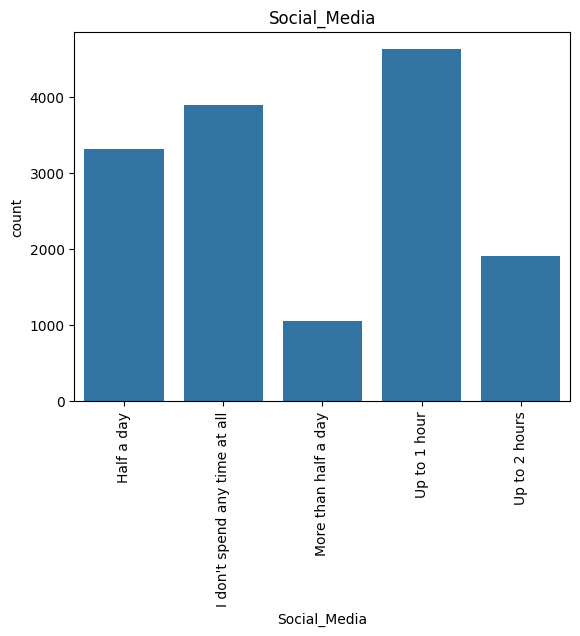

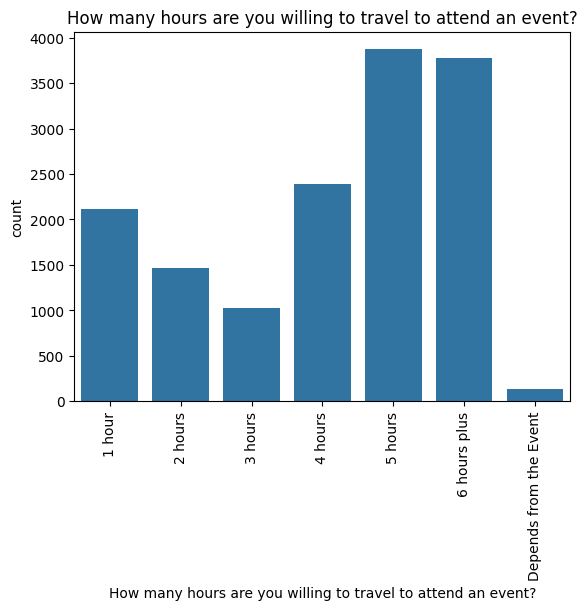

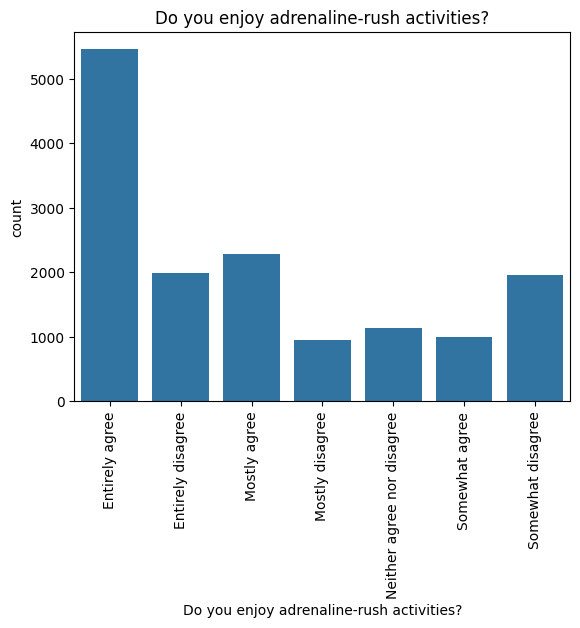

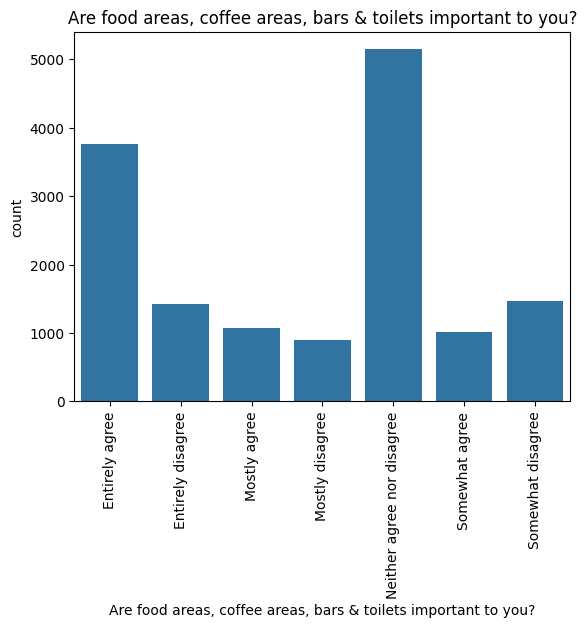

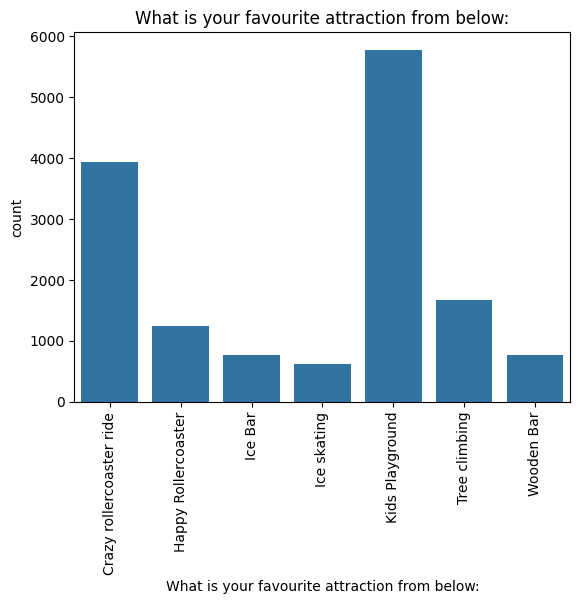

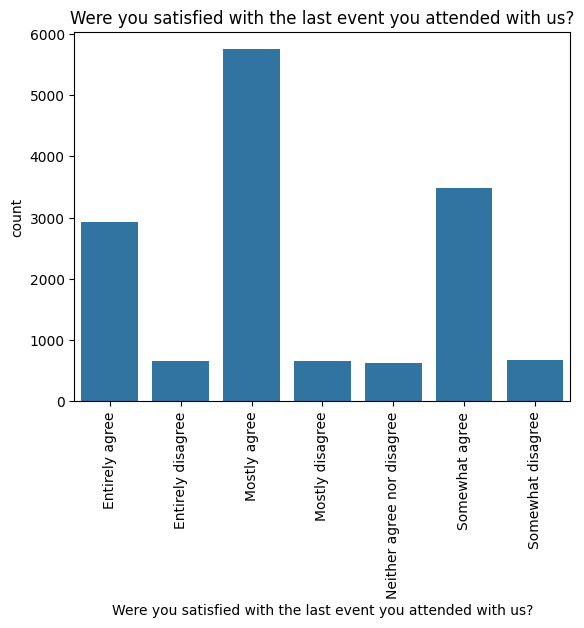

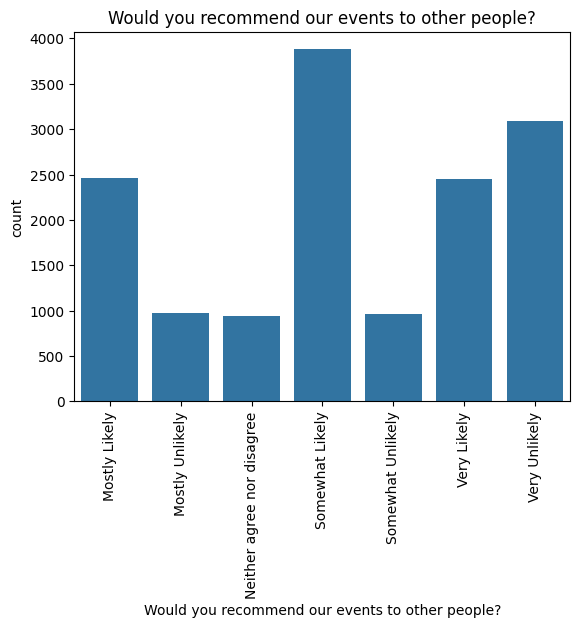

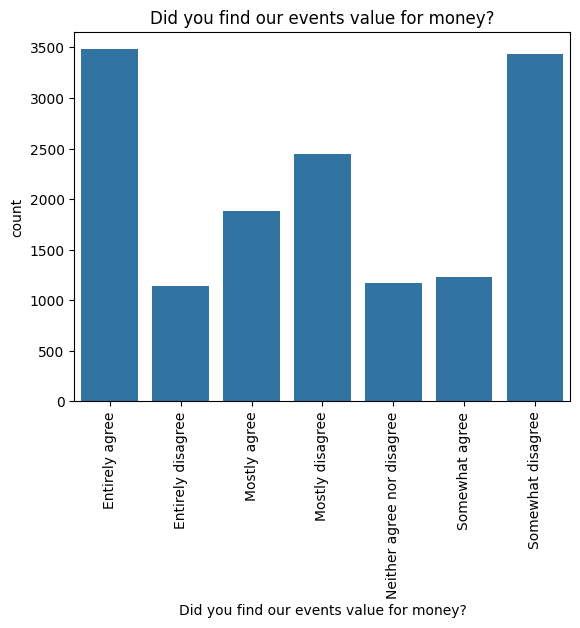

In [128]:
features_cat = ['Age', 'Gender', 'Current_Status', 'Total_Household_Income','How often you attend Entertaining events in a year?', 'Social_Media', 'How many hours are you willing to travel to attend an event?','Do you enjoy adrenaline-rush activities?','Are food areas, coffee areas, bars & toilets important to you?','What is your favourite attraction from below:','Were you satisfied with the last event you attended with us?','Would you recommend our events to other people?','Did you find our events value for money?']

for i in features_cat:
  order = sorted(df1[i].unique())
  sns.countplot(x=i, data= df1, order=order)
  plt.title(i)
  plt.xticks(rotation=90)
  plt.show()

**One Hot Encoding**

In [129]:
#Não usará a localização dos clientes (lat, long, district, postcode,Constituency)

#K-means só aceita variáveis contínuas
df2 = pd.get_dummies(df1[features_cat], columns = features_cat).astype(int)

**Scale**

In [130]:
# Inicializar o scaler de normalização (dados normais, com média 0 e desvio padrão 1)
scaler = StandardScaler()

# Aplicar a padronização (Z-Score)
df_standardized = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

In [131]:
# Inicializar o scaler de normalização (dados entre 0 e 1)
scaler = MinMaxScaler()

# Aplicar a padronização
df_normalized = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

#Como aqui todos os dados são flag, não faz diferença

#Componentes principais

In [132]:
#Gera componentes principais
n_components = 60

pca = PCA(n_components=n_components, random_state = 22)
PCA_evaluate = pca.fit(df_normalized).transform(df_normalized)

print(df_normalized.shape)
print(PCA_evaluate.shape)

(14778, 86)
(14778, 60)


Quantidade de componentes para atingir 95% de variância: 53


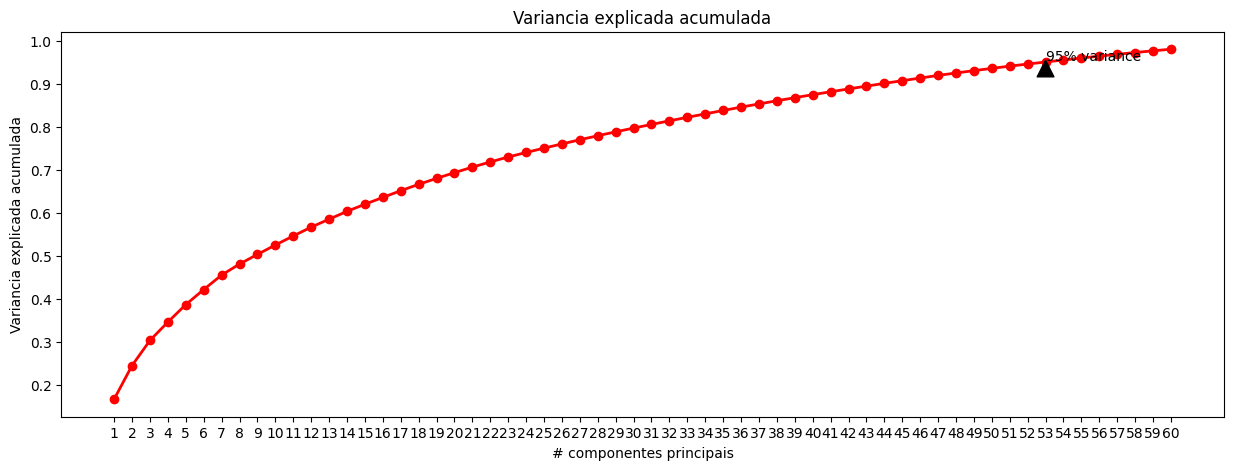

In [133]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Creating a df with the components qt and cumulative_variance_ratio
df_cumulative_variance_ratio = zip(range(1,n_components+1), cumulative_variance_ratio)
df_cumulative_variance_ratio = pd.DataFrame(df_cumulative_variance_ratio, columns=["PCA Comp", "Cum Explained Variance"])

#Calcula quantidade de componentes necessárias para explicar 95% da variância
n_components_95 = df_cumulative_variance_ratio[df_cumulative_variance_ratio["Cum Explained Variance"] >= 0.95]["PCA Comp"].iloc[0]
print('Quantidade de componentes para atingir 95% de variância:', n_components_95)

# Plot the cumulative explained variance
plt.figure(figsize=(15, 5))
plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o', linewidth=2, c="r")
plt.title('Variancia explicada acumulada')
plt.ylabel('Variancia explicada acumulada')
plt.xlabel('# componentes principais')
plt.xticks(range(1, n_components + 1))

# adding arrow no acumulado 95%
plt.annotate('95% variance', xy=(n_components_95, cumulative_variance_ratio[n_components_95]),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

In [134]:
#Gera base de treinamento com a quantidade de PCAs necessários para bater 95% da variância total
pca_train = PCA(n_components=n_components_95, random_state = 22)
X_train = pca_train.fit(df_normalized).transform(df_normalized)

#Método hierárquico (definir k)

**Dendograma**

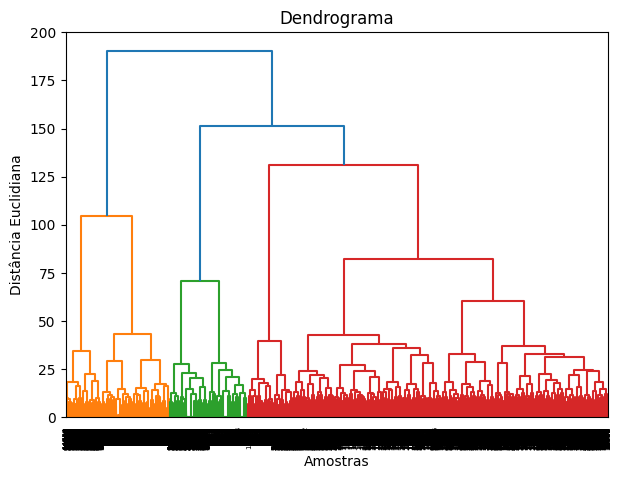

In [ ]:
# Criar o dendrograma
plt.figure(figsize=(7, 5))
dendrogram = sch.dendrogram(sch.linkage(X_train, method='ward'))

# Exibir o dendrograma
plt.title('Dendrograma')
plt.xlabel('Amostras')
plt.ylabel('Distância Euclidiana')
plt.show()

**Cotovelo**

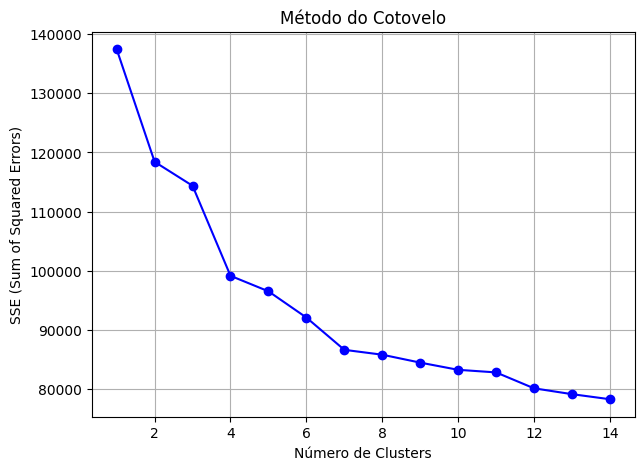

In [ ]:
# Lista para armazenar as somas dos erros quadrados (inertia)
sse = []

# Testar diferentes números de clusters
range_n_clusters = range(1, 15)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)  # A inércia é a soma dos erros quadrados

# Plotar o gráfico do Método do Cotovelo
plt.figure(figsize=(7, 5))
plt.plot(range_n_clusters, sse, 'bo-', label="SSE (Inertia)")
plt.xlabel("Número de Clusters")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("Método do Cotovelo")
plt.grid(True)
plt.show()

**Silhueta**

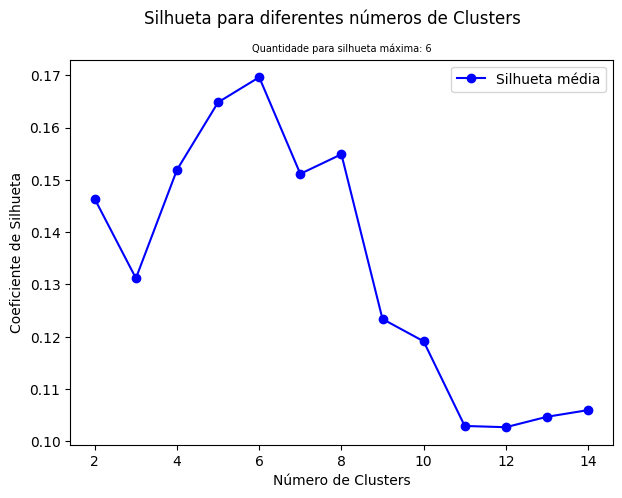

In [ ]:
range_n_clusters = list(range(2, 15)) # Testar diferentes números de clusters neste intervalo
silhouette_avg = []

for n_clusters in range_n_clusters:
    # Aplicar o clustering hierárquico
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_train)

    # Calcular o coeficiente de silhueta
    silhouette_avg.append(silhouette_score(X_train, cluster_labels))

# Melhor número de clusters (silhueta máxima)
melhor_n_clusters = range_n_clusters[np.argmax(silhouette_avg)]

# Exibir os resultados
plt.figure(figsize=(7, 5))
plt.plot(range_n_clusters, silhouette_avg, 'bo-', label="Silhueta média")
plt.xlabel("Número de Clusters")
plt.ylabel("Coeficiente de Silhueta")
plt.suptitle("Silhueta para diferentes números de Clusters")
plt.title(f'Quantidade para silhueta máxima: {melhor_n_clusters}', fontsize=7)
plt.legend()
plt.show()

#Método não hierárquico (model training)

In [135]:
#Pelos métodos hierárquicos, o ideal seria entre 6 e 8 clusters

k=6

kmeans = KMeans(n_clusters=k, random_state=22)
kmeans = kmeans.fit(X_train)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)

The Inertia is:  89260.83642267587


In [136]:
print(X_train.shape[0])
print(kmeans.labels_.shape) #marcação de um cluster por observação

14778
(14778,)


#Valida

In [203]:
#Cria base com output e nomes dos cluster

cluster_output = pd.DataFrame(kmeans.labels_)
cluster_output = cluster_output.rename(columns={0: 'cluster_num'})

#nomes_cluster = ['1.legal','2.bonito','3.bacana','4.diferente','5.exotico','6.inteligente']

def nome_cluster(row):
    for i in range(k):
      if row['cluster_num'] == i:
        return 'Cluster '+str(i+1)  #se quiser de chamar de Cluster N
        #return nomes_cluster[i]   # se tiver nome definidor
    else:
        return 'unknown cluster'

cluster_output['cluster_nome'] = cluster_output.apply(nome_cluster, axis=1)

In [204]:
pd.crosstab(cluster_output['cluster_num'],cluster_output['cluster_nome'])

cluster_nome,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
cluster_num,,,,,,
0,2179,0,0,0,0,0
1,0,1863,0,0,0,0
2,0,0,4075,0,0,0
3,0,0,0,984,0,0
4,0,0,0,0,4452,0
5,0,0,0,0,0,1225


**Volumetria**

<Figure size 300x200 with 0 Axes>

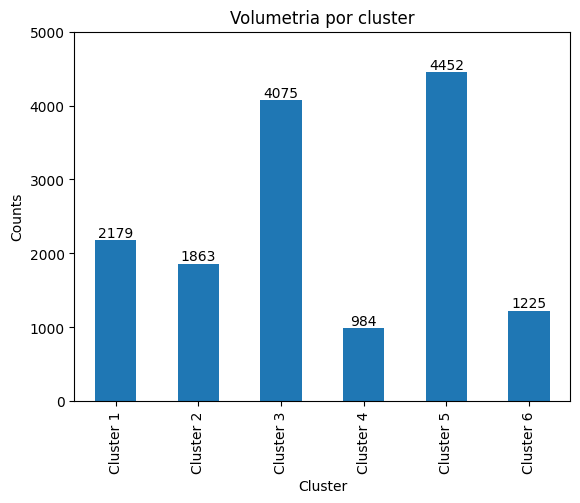

In [205]:
volume_cluster = cluster_output.groupby('cluster_nome').count()

#Gráfico de barras
plt.figure(figsize=(3, 2))
ax = volume_cluster.plot(kind='bar', legend=False)

# Adicionando rótulos de dados
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()),
                 ha='center', va='top', xytext=(0, 10), textcoords='offset points')

# Forçando o eixo Y a ir até 5000 - para o rótulo de dados caber
ax.set_ylim(0, 5000)

# Definindo os rótulos dos eixos e o título
plt.xlabel('Cluster')
plt.ylabel('Counts')
plt.title('Volumetria por cluster')

# Exibindo o gráfico
plt.show()

**Plot da separação**

<Figure size 640x480 with 0 Axes>

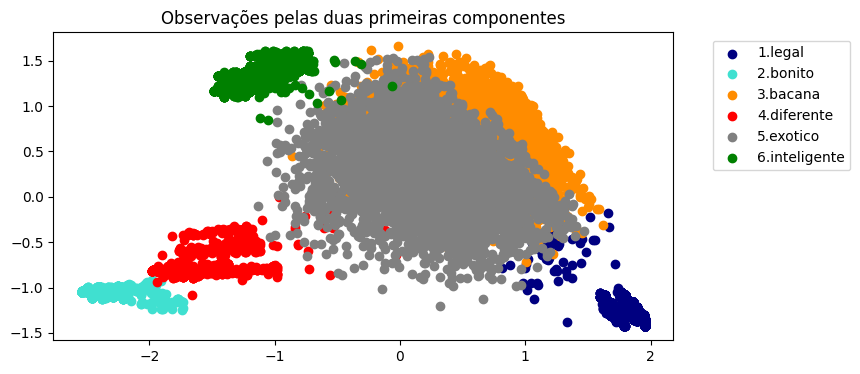

In [206]:
# Plotting the data
plt.figure()
plt.figure(figsize=(8,4))

colors = ['navy', 'turquoise', 'darkorange', 'red', 'gray', 'green', 'pink', 'purple']
#colors = list(matplotlib.colors.cnames.keys())[:k]

for color, i, cluster_name in zip(colors, range(k), cluster_names):
    #plot das observações pelas duas primeiras componentes - um plot por cluster
    plt.scatter(X_train[cluster_output['cluster_num'] == i, 0], #primeira componente principal
                X_train[cluster_output['cluster_num'] == i, 1], #segunda componente principal
                color=color,
                label=nomes_cluster[i])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title('Observações pelas duas primeiras componentes')
plt.show()

**Validação por árvore**

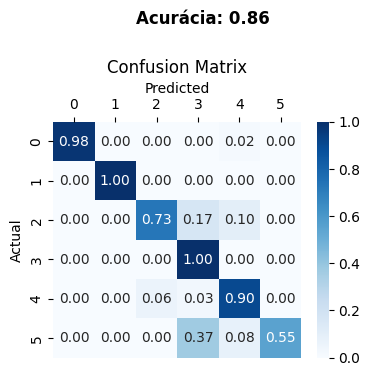

In [141]:
# Definir o modelo de árvore de decisão com máximo de k nós finais
tree_model = DecisionTreeClassifier(max_leaf_nodes=k, random_state=42)

tree_model.fit(X_train, cluster_output['cluster_num'])
y_pred = tree_model.predict(X_train)

#compara o cluster origem com a saída da arvore
accuracy = accuracy_score(cluster_output['cluster_num'], y_pred)

cm = confusion_matrix(cluster_output['cluster_num'], y_pred, normalize='true')

plt.figure(figsize=(4,4))

cm_plot = sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
cm_plot.xaxis.set_ticks_position('top')
cm_plot.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.suptitle(f"Acurácia: {accuracy:.2f}",fontweight='bold')
plt.subplots_adjust(top=0.7)
plt.show()

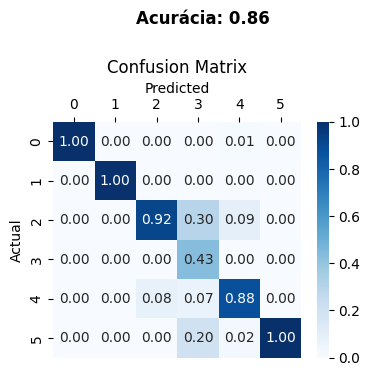

In [142]:
cm = confusion_matrix(cluster_output['cluster_num'], y_pred, normalize='pred')

plt.figure(figsize=(4,4))
cm_plot = sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
cm_plot.xaxis.set_ticks_position('top')
cm_plot.xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.suptitle(f"Acurácia: {accuracy:.2f}",fontweight='bold')
plt.subplots_adjust(top=0.7)
plt.show()

#Interpretação

In [207]:
#Gera base com as variáveis originais e os clusters finais
df_results = pd.concat([df1,cluster_output],axis=1)
df_results = df_results.sort_values('cluster_nome')

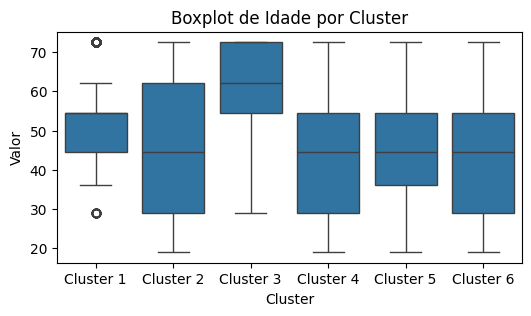

In [208]:
df_results['Age_n1'] = df_results['Age'].str[:2].astype(int)
df_results['Age_n2'] = df_results['Age'].str[3:5]
df_results['Age_n2'] = df_results['Age_n2'].replace('or','80')
df_results['Age_n2'] = df_results['Age_n2'].astype(int)
df_results['Age_pontomedio'] = (df_results['Age_n1'] + df_results['Age_n2'])/2

plt.figure(figsize=(6, 3))
sns.boxplot(x='cluster_nome', y='Age_pontomedio', data=df_results)

# Adicionando rótulos e título
plt.xlabel('Cluster')
plt.ylabel('Valor')
plt.title('Boxplot de Idade por Cluster')

# Exibindo o gráfico
plt.show()

<Figure size 600x200 with 0 Axes>

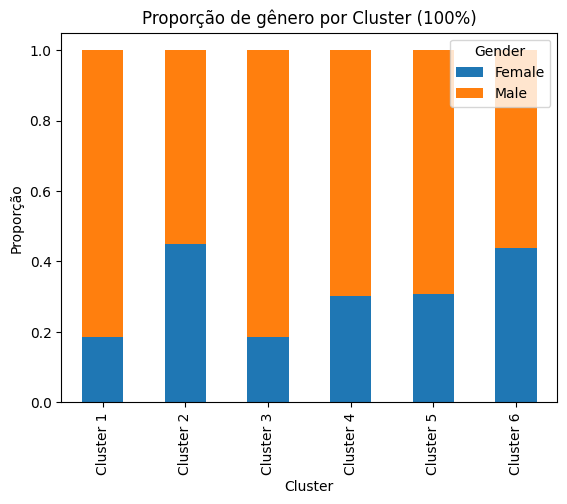

In [209]:
percent_gender = pd.crosstab(df_results['cluster_nome'], df_results['Gender'],normalize='index')

plt.figure(figsize=(6,2))
percent_gender.plot(kind='bar', stacked=True)
plt.title('Proporção de gênero por Cluster (100%)')
plt.xlabel('Cluster')
plt.ylabel('Proporção')
plt.show()

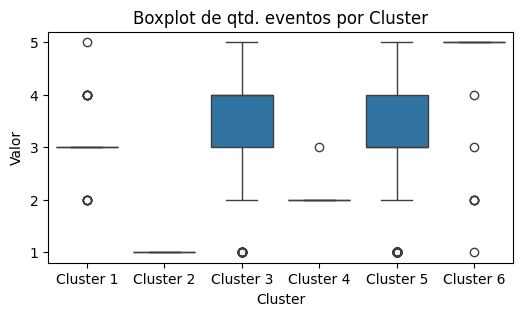

In [210]:
df_results['events_year_n'] = df_results['How often you attend Entertaining events in a year?'].str[:1].astype(int)

plt.figure(figsize=(6, 3))
sns.boxplot(x='cluster_nome', y='events_year_n', data=df_results)

# Adicionando rótulos e título
plt.xlabel('Cluster')
plt.ylabel('Valor')
plt.title('Boxplot de qtd. eventos por Cluster')

# Exibindo o gráfico
plt.show()

#Escorar nova base

In [ ]:
#garantir que nova_base tenha as mesmas variáveis com mesmos tratamentos de X_train
#clusters_nova_base = kmeans.predict(nova_base)